In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import Image
from tensorflow.keras.datasets import mnist
import cv2 
import numpy as np
from PIL import Image as im
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [69]:
len(x_train)

60000

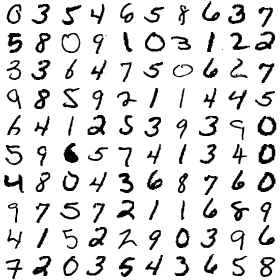

In [87]:
v = []
h = []
n_images = 10
some_const = 234
for i in range(n_images):
    for j in range(n_images):
        if j == 0:
            h.append(np.invert(x_train[n_images*i+j+some_const]))
        else:
            h[i] = np.concatenate((h[i], np.invert(x_train[n_images*i+j+some_const])), axis=1)
    if i == 0:
        v = h[0]
    else:
        v = np.concatenate((v, h[i]), axis=0)

train_image = im.fromarray(v)

display(train_image)

# cv2.imshow('VERTICAL', v) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows() 

In [12]:
np.shape(x_train)

(60000, 28, 28)

In [13]:
x_train=x_train.reshape(-1,28*28).astype("float32")/255.0
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0

# Using Machine Learning Models

### Naive Bayes Classifier

In [14]:
model_m = MultinomialNB()
model_m.fit(x_train, y_train)

MultinomialNB()

In [15]:
pred_m = model_m.predict(x_test)

In [16]:
print(f"The accuracy score is {accuracy_score(y_test,pred_m)*100}%")

The accuracy score is 83.57%


In [17]:
print(classification_report(y_test, pred_m))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.74      0.79       982
           5       0.87      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.85      0.77      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



In [11]:
print(confusion_matrix(y_test,pred_m))
#sns.heatmap(confusion_matrix(y_test,pred_m),cmap='viridis',annot=True);   

[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    1    6    0   52    1]
 [  15   11  858   24   10    3   32   12   66    1]
 [   4   11   34  852    1   19    7   14   41   27]
 [   2    2    6    0  731    0   25    1   38  177]
 [  23   12    6  108   18  586   17    6   79   37]
 [  18   13   17    1    8   24  859    0   18    0]
 [   1   21   11    5   18    0    1  861   41   69]
 [   6   26   13   55   14   27    8    9  776   40]
 [   6    8    3   11   65    9    1   18   27  861]]


### K-Nearest Neighbors Classifier

In [18]:
model_k = KNeighborsClassifier()
model_k.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
pred_k = model_k.predict(x_test)

In [21]:
print(f"The accuracy score is {accuracy_score(y_test,pred_k)*100}%")

The accuracy score is 96.88%


In [22]:
print(classification_report(y_test, pred_k))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [23]:
print(confusion_matrix(y_test,pred_k))
# sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);   

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


### Logistic Regression

In [24]:
model_lr = LogisticRegression(max_iter=1000, solver='lbfgs')

In [25]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
pred_lr = model_lr.predict(x_test)

In [27]:
print(f"The accuracy score is {accuracy_score(y_test,pred_lr)*100}%")

The accuracy score is 92.60000000000001%


### Random Forest Classifier 

In [28]:
model_rf = RandomForestClassifier()

In [29]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
pred_rf = model_rf.predict(x_test)

In [31]:
print(f"The accuracy score is {accuracy_score(y_test, pred_rf)*100}%")

The accuracy score is 97.0%


In [32]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [33]:
print(confusion_matrix(y_test,pred_rf))

[[ 971    0    0    0    0    2    2    1    4    0]
 [   0 1123    2    3    2    2    2    0    1    0]
 [   6    0  999    6    3    0    4    8    6    0]
 [   0    0   10  972    0    8    0    9    7    4]
 [   0    0    3    0  953    0    4    0    2   20]
 [   3    0    0   13    1  863    4    2    5    1]
 [   8    3    0    0    4    4  938    0    1    0]
 [   1    4   19    2    1    0    0  986    3   12]
 [   4    0    5    7    4    5    3    5  932    9]
 [   7    5    2    8   11    2    1    5    5  963]]


### Support Vector Machine

In [34]:
from sklearn.svm import SVC
model_svc = SVC()

In [35]:
model_svc.fit(x_train, y_train)

SVC()

In [36]:
pred_svc = model_svc.predict(x_test)

In [37]:
print(f"The accuracy score is {accuracy_score(y_test, pred_svc)*100}%")

The accuracy score is 97.92%


### Gradient Boost Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()

In [39]:
model_gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [40]:
pred_gbc = model_gbc.predict(x_test)

In [41]:
print(f"The accuracy score is {accuracy_score(y_test, pred_gbc)*100}%")

The accuracy score is 94.59%


### XGBoost Classifier

In [42]:
import xgboost as xgb

In [43]:
model_xgb = xgb.XGBClassifier()

In [44]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
pred_xgb = model_xgb.predict(x_test)

In [46]:
print(f"The accuracy score is {accuracy_score(y_test, pred_xgb)*100}%")

The accuracy score is 97.95%


In [47]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [48]:
print(confusion_matrix(y_test,pred_xgb))
# sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);  

[[ 970    1    0    0    0    2    3    1    2    1]
 [   1 1125    3    2    0    1    2    1    0    0]
 [   5    0 1008    7    2    0    0    6    3    1]
 [   1    0    3  990    0    3    0    6    4    3]
 [   0    0    2    1  958    0    4    0    2   15]
 [   2    1    0    5    0  872    4    3    3    2]
 [   5    3    1    0    2    4  940    0    3    0]
 [   1    1   13    1    2    0    0 1000    1    9]
 [   3    1    2    3    3    4    2    1  951    4]
 [   5    4    1    5    6    0    0    4    3  981]]


# Using Neural Networks 

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
model_nn = keras.Sequential(
    [
        keras.Input(shape=(784,)),# Notice the comma after 784 to specify a tuple with a single element
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10),
    ]
)

In [50]:
print(model_nn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


In [51]:
model_nn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),#Try other optimizers like  Adagrade , Gradient decent with momentum ,RMSprop for diff accu
    metrics=["accuracy"],
)

In [52]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

model_nn.fit(x_train,y_train,batch_size=32,epochs=10,verbose=2,callbacks=[early_stopping])

Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9436 - loss: 0.1867
Epoch 2/10
1875/1875 - 7s - 3ms/step - accuracy: 0.9746 - loss: 0.0809
Epoch 3/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9818 - loss: 0.0555
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9867 - loss: 0.0414
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9887 - loss: 0.0341
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9907 - loss: 0.0284
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9923 - loss: 0.0236
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9933 - loss: 0.0212
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9940 - loss: 0.0184
Epoch 10/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9949 - loss: 0.0178


In [53]:
model_nn.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9784 - loss: 0.1092


[0.10922130197286606, 0.9783999919891357]

In [54]:
pred_nn_arr = model_nn.predict(x_test)
pred_nn = np.argmax(pred_nn_arr,axis = 1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [55]:
print(f"The accuracy score is {accuracy_score(y_test, pred_nn)*100}%")

The accuracy score is 97.84%


In [56]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.96      0.99      0.97       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [57]:
print(confusion_matrix(y_test,pred_nn))
# sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);  

[[ 973    1    0    0    0    0    4    1    1    0]
 [   0 1129    0    1    0    1    1    0    3    0]
 [   7    0 1009    4    2    0    3    4    3    0]
 [   2    0    2  989    0    9    0    3    2    3]
 [   0    1    1    0  955    0    7    2    2   14]
 [   2    0    0    6    1  873    7    1    1    1]
 [   0    3    0    1    1    3  950    0    0    0]
 [   2    4    6    2    0    0    0 1006    1    7]
 [   8    0    4    1    1   12   19    3  923    3]
 [   3    4    0    6    5    7    2    3    2  977]]


# Using Convolutional Neural Networks

In [58]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [59]:
model_cnn = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

E:\ML\ML_Models\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
print(model_cnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452,618 (1.73 MB)

 Trainable params: 452,618 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

None


In [61]:
model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),#Try other optimizers like  Adagrade , Gradient decent with momentum ,RMSprop for diff accu
    metrics=["accuracy"],
)

In [62]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

model_cnn.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=2,callbacks=[early_stopping])

Epoch 1/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9549 - loss: 0.1416
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9858 - loss: 0.0462
Epoch 3/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9885 - loss: 0.0358
Epoch 4/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9914 - loss: 0.0280
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9929 - loss: 0.0221
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9946 - loss: 0.0177
Epoch 7/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9946 - loss: 0.0178
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9954 - loss: 0.0149
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9959 - loss: 0.0132
Epoch 10/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9963 - loss: 0.0118


In [63]:
model_cnn.evaluate(X_test, Y_test, batch_size=32, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9890 - loss: 0.0407


[0.040655359625816345, 0.9890000224113464]

In [64]:
pred_cnn_arr = model_cnn.predict(X_test)
pred_cnn = np.argmax(pred_cnn_arr, axis = 1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [65]:
print(f"The accuracy score is {accuracy_score(y_test, pred_cnn)*100}%")

The accuracy score is 98.9%


In [66]:
print(classification_report(y_test, pred_cnn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.97      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [67]:
print(confusion_matrix(y_test,pred_cnn))
# sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);  

[[ 975    0    0    0    0    0    3    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2   12 1003    0    1    0    0   13    1    0]
 [   0    1    0 1001    1    6    0    1    0    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    1    0    6    0  883    1    0    0    0]
 [   4    3    0    0    1    6  942    0    2    0]
 [   0    7    1    0    1    0    0 1018    0    1]
 [   0    0    0    3    0    1    0    2  965    3]
 [   3    0    0    0    8    5    0    4    0  989]]
